# Business Case
With the number of vehicles increasing in the modern day. It is important to have a track of them. With the number of gated communities increasing these days. It is hard for a naked eye to keep unauthorised vechiles away from the community or office space. As the technology increases unlawful activities also increases. Such as illegal, criminal activites with vehicles. And also driving with unregistered or experied registration. Or to find out if the vechiles are due of a penality. Such day to day issues should be monitord and tackled. 

# ML Problem Statement
In this modern day of technology and surveillance. You have surveillance camera's all over. The main goal here is to build a high precision vehicle number plate recognition model. This model can simply be flashed into exsiting surveillance camers. To monitor if the vehicle has authorization into a certain space or not.

# About the Dataset
In this problem we do not have a dataset. We try to recognize the number from the live feed and cross check with the database and out put the related information

## Required Libraries and Files

In [52]:
import cv2
import numpy as np
import pandas as pd 
import os
import math
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
print (cv2.__version__)



import pytesseract
from PIL import Image
from pytesseract import image_to_string
from imutils import contours

4.1.2


## Taking Image as an input

In [53]:
read_mode = 1 
car_image = cv2.imread('input/frame2.jpg', read_mode)
#car_image = cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB) #defined a function below to convert from BGR to RGB

## Function to show output on notebook

In [54]:
 #funstion to show the image and convert back to RGB
def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()

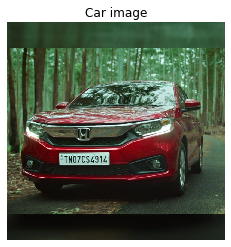

In [55]:
plt_show(car_image,title="Car image")

## Detecting  number plate from the input

In [56]:
detector = cv2.CascadeClassifier("xml/indian_license_plate.xml")
plate_coor = detector.detectMultiScale(car_image,scaleFactor=1.3,minNeighbors=7)
print ("Type: " + str(type(plate_coor)))
print (plate_coor)
print ("Length: " + str(len(plate_coor))) 

Type: <class 'numpy.ndarray'>
[[188 477 193  48]]
Length: 1


## Declaring Region of Interest
We draw a rectange around the number plate

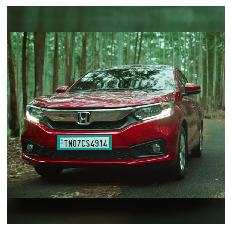

In [57]:
#drawing rectange around number plate
for (x, y, w, h) in plate_coor:
    cv2.rectangle(car_image, (x, y), (x + w, y + h), (150, 150, 0), 8)
plt_show(car_image) 

## Funtion to cut the prefered region

In [58]:
def cut_plate(frame, plate_coor):
    plate = []
      
    for (x, y, w, h) in plate_coor:
        w_rm = int(0.09 * w / 15)
        plate.append(frame[y: y + h, x + w_rm: x + w - w_rm])
         
    return plate


## Here we cut the number plate of the vehicle
By doinng so we reduce the noise and eleminate Unnecessary background

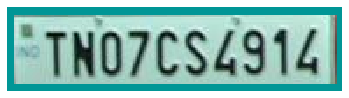

In [59]:
ROI = cut_plate(car_image, plate_coor)
plt_show(ROI[0])


## Funtion to plot two images 

In [60]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [61]:
#converting into gray scale
gray = cv2.cvtColor(ROI[0], cv2.COLOR_BGR2GRAY)

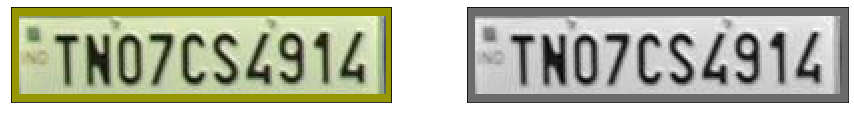

In [62]:
plot_images(ROI[0], gray)

In [63]:
#bluring the image
blur = cv2.bilateralFilter(ROI[0], 11,90, 90)

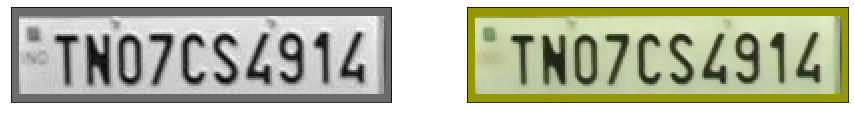

In [64]:
plot_images(gray, blur)

In [67]:
#edge detection
edges = cv2.Canny(ROI[0], 30, 200)

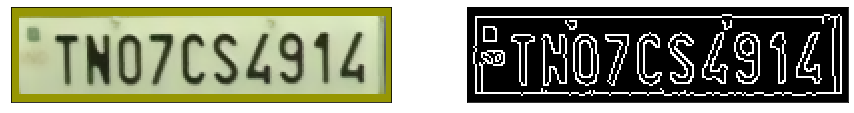

In [68]:
plot_images(blur, edges)

## pyteseract converts an image into a string

### ROI Filter

In [69]:
ROI_text = pytesseract.image_to_string(ROI[0], lang='eng')
print(ROI_text)

“TNO7CS4914 |


### Gray Filter

In [70]:
Gray_text = pytesseract.image_to_string(gray, lang='eng')
print(Gray_text)

“TNO7CS4914


### Blur Filter

In [71]:
Blur_text = pytesseract.image_to_string(blur, lang='eng')
print(Blur_text)

“TNO7CS4914|


### Edge Filter

In [72]:
Edge_text = pytesseract.image_to_string(edges, lang='eng')
print(Edge_text)

BETS


### With all the filter applied. Blur Filter has been the most efficient

#### Reads the Authorized Car number list

In [20]:
AC = pd.read_csv('Authorized_cars.csv')

In [21]:
AC.head()

,V_number
0,AP37H6699


In [24]:
#Check if the detected number is in the list and outputs the result

In [22]:
result = AC['V_number'].str.contains(Edge_text)

In [23]:
print(result)

0    False
Name: V_number, dtype: bool


# Improvements 
1. Rather than a image. You can input a video or a live feed.
2. More preprocessing steps including a deep learning model to have a robust detecton method
3. Automate gate access or entry with detection 
4. Report activity details of the vehicle. Such as an amount of time the vechile has spent in the location
5. Add conditions to find details or add details to the related vehicle